# Problem Statement

All the countries across the globe have adapted to means of digital payments.And with the increased volume of digital payments, hacking has become common event
Wherein the hacker can try to hack your details just with your phone number linked to your bank account.
However, there is data with some anonymized variables based on which one can predict that the hack is going to happen.

The problem is to build a predictive model which can identify a pattern in these variables and suggest that a hack is going to happen So that the cyber security can somehow stop it before it happens.

- [Import Packages](#section1)<br>
- [Exploring the data ](#section2)<br>
- [Visualizing the data](#section3)<br>
- [Preprocessing](#section4)<br>
- [Model Selection](#section5)<br>
- [Test for unseen data & output file ](#section6)<br>

In [1]:
#Packages if not installed on your machine which are used in the below notebook

#!pip install -U imbalanced-learn
# !pip install feature_engine


<a id=section1></a>
## Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Model libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier


#Other Libraries
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split,RandomizedSearchCV
from sklearn.metrics import recall_score,precision_score,confusion_matrix
import scipy.stats as stats

<a id=section2></a>
## Exploring the data 

In [3]:
data = pd.read_csv('.\Dataset\Train.csv')
data_test = pd.read_csv('.\Dataset\Test.csv')

### Data:
- X_1 - X_15 : Anonymized logging parameters
- Date : Date wof Incident occurance
- Incident ID : ID of the occurance of event
- Multiple Offense : Indicates that if the incident was hack

In [4]:
data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [5]:
data_test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [6]:
data.shape # shape of the data 

(23856, 18)

In [7]:
data.info() #getting more information on the dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [8]:
data.describe()  # To check on the statistics

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [9]:
data.isnull().sum() #checking for missing values in data

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [10]:
data.columns #columns of the data

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')

## Visualizing the target variable

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64


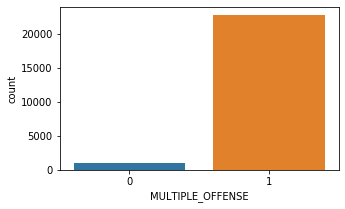

In [11]:
print(data['MULTIPLE_OFFENSE'].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(data['MULTIPLE_OFFENSE'])

We can see that the data is misbalanaced & most of the mails are from hackers(suspicious). Using imbalanced data can cause the over fit. So we need to deal with it

All the above exploratory things we can do using the below open source Python library __sweetviz__ that generates beautiful, high-density visualizations

In [12]:
#!pip install --user sweetviz

From the above beautiful reports , we can see that categorical_features are 'X_1', 'X_4', 'X_5','X_9' & numerical features are 'X_2', 'X_3', 'X_6','X_7', 'X_8', 'X_10', 'X_11','X_12', 'X_13', 'X_14','X_15' & also there are some missing values in X_12 feature both in train & unseen data

### Splitting the data into test & train before we do any preprocessing or implementing sampling techniques

In [13]:
X = data.drop('MULTIPLE_OFFENSE', axis=1)
y = data['MULTIPLE_OFFENSE']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25, random_state = 42, stratify=y)

In [15]:
print('y_train:\n',y_train.value_counts(normalize = True))
print('y_test:\n',y_test.value_counts(normalize = True))

y_train:
 1    0.955231
0    0.044769
Name: MULTIPLE_OFFENSE, dtype: float64
y_test:
 1    0.955231
0    0.044769
Name: MULTIPLE_OFFENSE, dtype: float64


We can see that there is proper distribution of data for both the varaibles 0 & 1 for both test & train. 

<a id=section3></a>
## Visualizing the data

### Checking the distribution of Continous variables

In [16]:
# function to create histogram, Q-Q Plot and boxplot

def diagnostic_plots(df,variable):
    
    #define figure size
    plt.figure(figsize =(16,4))
    
    #histogram
    plt.subplot(1,3,1)
    sns.distplot(df[variable], bins = 30, kde = False)
    plt.title('Histogram')
    
    #Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.ylabel('RM quantiles')
    
    # box plot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

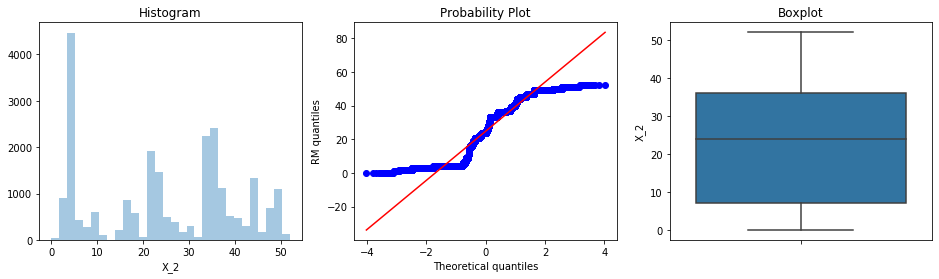

In [17]:
diagnostic_plots(data,'X_2')

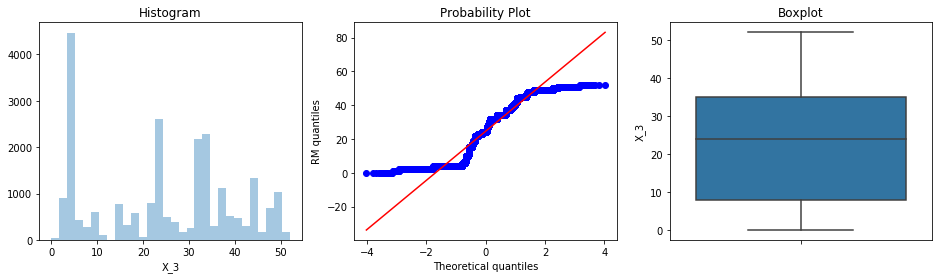

In [18]:
diagnostic_plots(data,'X_3')

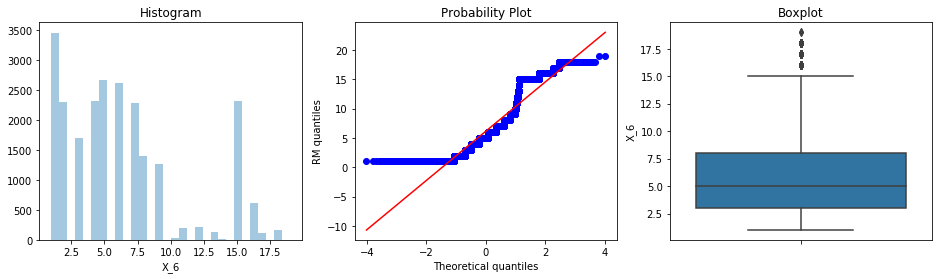

In [19]:
diagnostic_plots(data,'X_6')

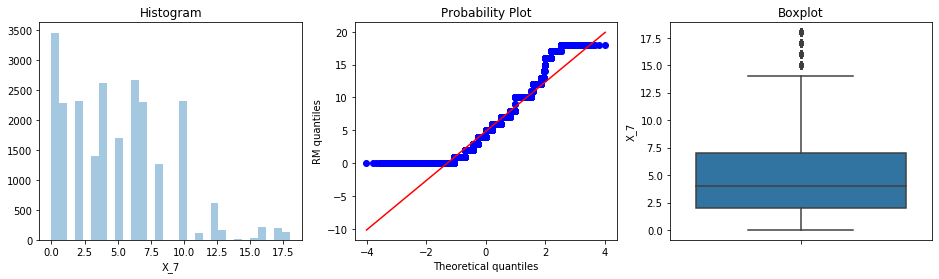

In [20]:


diagnostic_plots(data,'X_7')

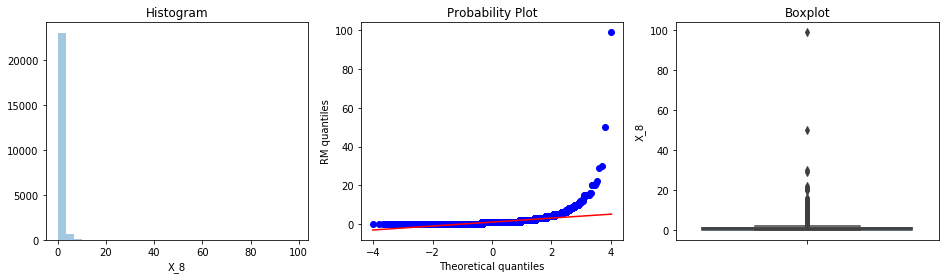

In [21]:
diagnostic_plots(data,'X_8')

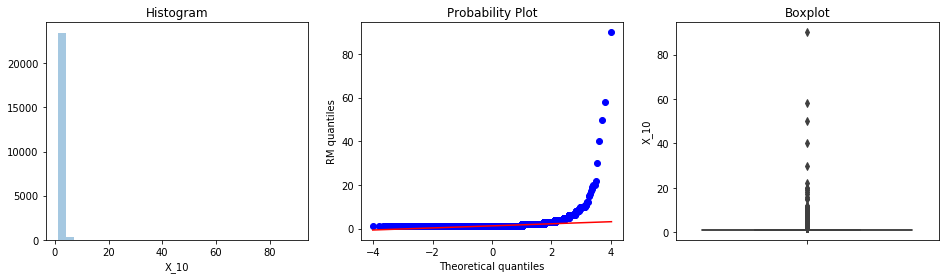

In [22]:
diagnostic_plots(data,'X_10')

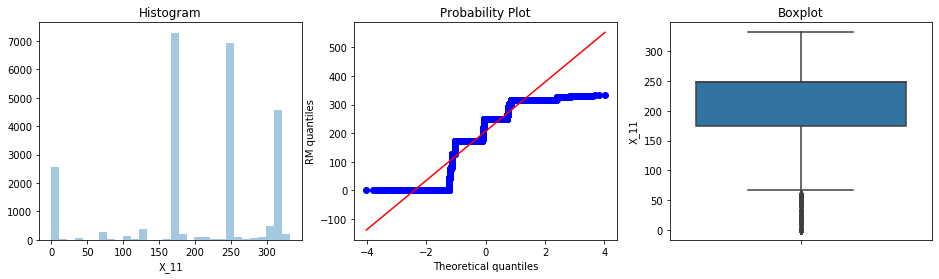

In [23]:
diagnostic_plots(data,'X_11')

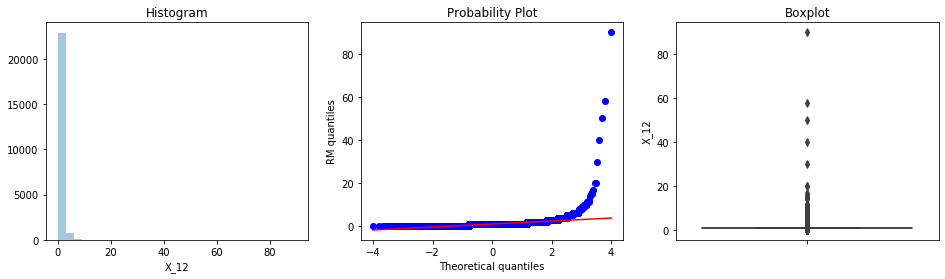

In [24]:
diagnostic_plots(data.dropna(),'X_12')

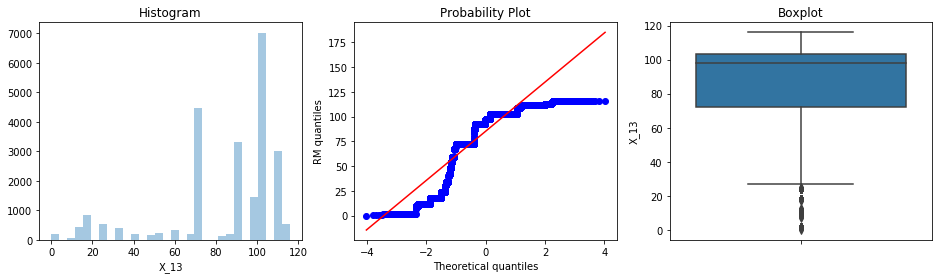

In [25]:
diagnostic_plots(data,'X_13')

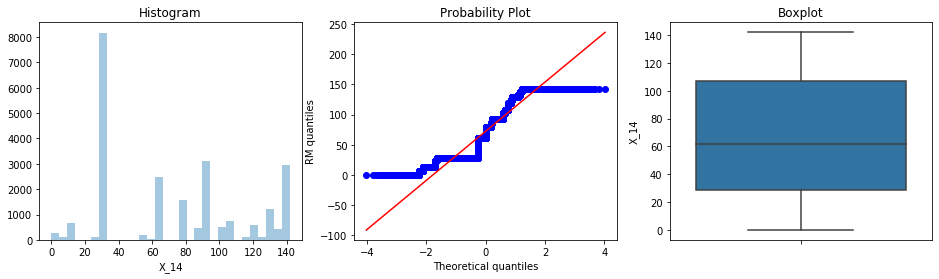

In [26]:
diagnostic_plots(data,'X_14')

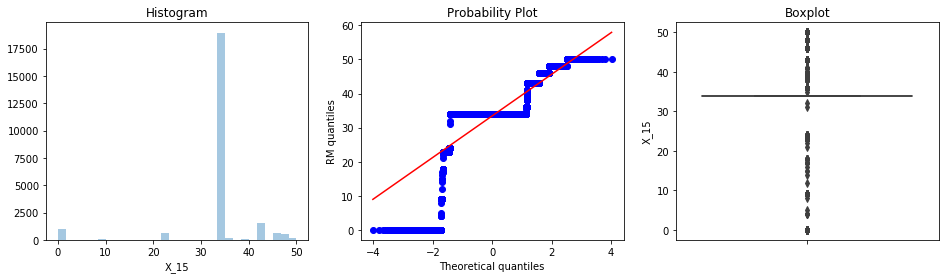

In [27]:
diagnostic_plots(data,'X_15')

We can see that there are many outliers in the data for the columns X_6, X_7,X_8,X_10,X_11,X_12,X_13,X_15.

Instead of removing this ouliers we will use a technique called __Capping or Censoring capping__ the maximum and /or minimum of a distribution at an arbitrary value. On other words, values bigger or smaller than the arbitrarily determined ones are censored.

This can be done using __Winsorizer__ method from the __feature engine__

### Distribution of categorical variables 

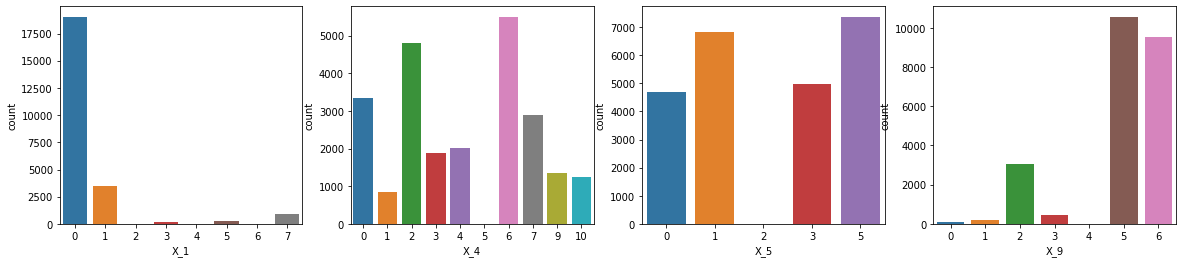

In [28]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.countplot(data['X_1'],ax=axes[0])
sns.countplot(data['X_4'],ax=axes[1])
sns.countplot(data['X_5'],ax=axes[2])
sns.countplot(data['X_9'],ax=axes[3])


From the above plots , we can observe that for X_1 & X_9 there are only there are variables giving very less information.
In this cases we can use the select the top frequent values using OneHotCategoricalEncoder

<a id=section4></a>

## Preprocessing

- We gonna use Pipelines for dropping the columns, doing standardization of Numerical data & for Frequent one hot encoding for categorical data

In [29]:
# Pipelines
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pl1

#preprocessing methods
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

#preprocessing methods using feature engine
from feature_engine import categorical_encoders as ce
from feature_engine.outlier_removers import Winsorizer

### Preprocessing steps that need to be done before fitting the model

- Missing values to be imputed for feature 'X_12'
- Oulier treatment using capping technique.
- Creating a pipleine with Standardization using standard scale on continous data & one hot encoding on Cagtegorical data
- Drop the columns 'INCIDENT_ID' & 'DATE' as not much information is available
- Fit the data and transform on both X_train & test
The data will be ready for using to the model after the above steps

In [30]:
numerical_features = ['X_2', 'X_3', 'X_6','X_7', 'X_8', 'X_10', 'X_11','X_12', 'X_13', 'X_14','X_15']
categorical_features = ['X_1', 'X_4', 'X_5','X_9']
outliers_data = ['X_6', 'X_7','X_8','X_10','X_11','X_12','X_13','X_15']

### Missing data imputation
As the X_12 feature data is skewed, the missing data can be replaced using median.

In [31]:
X_train['X_12'] = X_train['X_12'].fillna(X_train['X_12'].median())
X_test['X_12'] = X_test['X_12'].fillna(X_test['X_12'].median())

### Outlier Treatment
We are gonna treat the outliers for each individual variable in different ways of which tail to be considered for the capping method.
So in the below code we have created a pipeline

In [32]:
categorical_features = ['X_1', 'X_4', 'X_5','X_9']
X_train[categorical_features] = X_train[categorical_features].astype('object')
X_test[categorical_features] = X_test[categorical_features].astype('object')

In [33]:
outlier_treat =Pipeline(steps = [
              ('outlier1', Winsorizer(distribution = 'gaussian', tail = 'right',fold = 3, variables = ['X_6', 'X_7','X_8','X_10','X_12'])),
              ('outlier2', Winsorizer(distribution = 'gaussian', tail = 'left',fold = 3, variables = ['X_11', 'X_13'])),
              ('outlier3', Winsorizer(distribution = 'gaussian', tail = 'both',fold = 3, variables = ['X_15']))
                                      ])

In [34]:
outlier_treat.fit(X_train)

Pipeline(steps=[('outlier1',
                 Winsorizer(variables=['X_6', 'X_7', 'X_8', 'X_10', 'X_12'])),
                ('outlier2',
                 Winsorizer(tail='left', variables=['X_11', 'X_13'])),
                ('outlier3', Winsorizer(tail='both', variables=['X_15']))])

In [35]:
X_train = outlier_treat.transform(X_train)

The outlier treatment will be only done on the train data but not the test data.

### Creating pipelines with Standardization on Continous values & One Hot encoding for frequent categories using Feature engine

In [36]:
# Converting the categorical variables to 'object' for doing the one hot encoding operation
X_train[categorical_features] = X_train[categorical_features].astype('object')
X_test[categorical_features] = X_test[categorical_features].astype('object')

In [37]:
numeric_transformer = Pipeline(steps = [
              ('scaler', StandardScaler())
                     ])
categorical_transformer = Pipeline(steps=[
    ('onehot3',ce.OneHotCategoricalEncoder(top_categories = 3, variables = ['X_9','X_1'] )),
    ('onehot4',ce.OneHotCategoricalEncoder(top_categories = 4, variables = ['X_5'] )),
    ('onehot10',ce.OneHotCategoricalEncoder(top_categories = 9, variables = ['X_4'] ))
])

### Creating a column transformer

In [38]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
                 ('drop_columns', 'drop', ['INCIDENT_ID','DATE']), #dropping the columns 
                 ('num', numeric_transformer, numerical_features),
                 ('cat', categorical_transformer,categorical_features)
    ])

### Fitting the data to the created column transformer

In [39]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('drop_columns', 'drop',
                                 ['INCIDENT_ID', 'DATE']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['X_2', 'X_3', 'X_6', 'X_7', 'X_8', 'X_10',
                                  'X_11', 'X_12', 'X_13', 'X_14', 'X_15']),
                                ('cat',
                                 Pipeline(steps=[('onehot3',
                                                  OneHotCategoricalEncoder(top_categories=3,
                                                                           variables=['X_9',
                                                                                      'X_1'])),
                                                 ('onehot4',
                                                  OneHotCategoricalEncoder(top_categories=4,
                                                                         

### Transforming the data on the Train & test

In [40]:
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

<a id=section5></a>
# Model Selection

We can try to fit the imbalanced data on below models

- XGBOOST
- ADA Boost
- Balanced Bagging classifier
- Support vector machine
- Random Forest

**Evaluation Metric : Recall score : TP/(TP+FN)**

### XGB Classifier with Hyper parameter 

In [41]:
xgb_model = xgb.XGBClassifier(scale_pos_weight= 1,min_child_weight=1,learning_rate= 0.35,gamma= 0.3,colsample_bytree= 0.3 )

In [42]:
xgb_model.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.3, gamma=0.3, learning_rate=0.35)

In [43]:
y_pred_xgb = xgb_model.predict(X_test)

score = recall_score(y_test,y_pred_xgb)
print(score)
confusion_matrix(y_test,y_pred_xgb, labels = [1,0])

0.9996489380375636


array([[5695,    2],
       [   1,  266]], dtype=int64)

### ADA boost

In [45]:
ada_model = AdaBoostClassifier()

In [46]:
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

score = recall_score(y_test,y_pred_ada)
print(score)
confusion_matrix(y_test,y_pred_ada, labels = [1,0])

0.9987712831314727


array([[5690,    7],
       [  28,  239]], dtype=int64)

## Balanced Bagging Classifier

In [47]:

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),sampling_strategy='auto',
replacement=False,random_state=0)

cross_val_score(bbc,X_train,y_train,cv =5,scoring="recall")

array([0.98976309, 0.98624927, 0.97952019, 0.98186074, 0.98888239])

In [48]:
from sklearn.metrics import precision_score
bbc.fit(X_train, y_train)
y_pred_bbc = bbc.predict(X_test)

score = recall_score(y_test,y_pred_bbc)
precision = precision_score(y_test,y_pred_bbc)
print(score)
print('precision :', precision)
confusion_matrix(y_test,y_pred_bbc, labels = [1,0])


0.9892926101456907
precision : 1.0


array([[5636,   61],
       [   0,  267]], dtype=int64)

### SVM with Weighted class

In [49]:
model = SVC(class_weight = 'balanced', C = 0.1 , kernel = 'poly', tol = 0.001)

In [50]:
model.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)

score = recall_score(y_pred_svm,y_test)
print(score)
confusion_matrix(y_pred_svm,y_test, labels = [1,0])


0.9967111627007158


array([[5152,   17],
       [ 545,  250]], dtype=int64)

### Random Forest classifier with hyper parameter

In [51]:
model_rf = RandomForestClassifier(class_weight='balanced_subsample')

In [52]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

score = recall_score(y_pred_rf,y_test)
print(score)
confusion_matrix(y_pred_rf,y_test, labels = [1,0])

0.989221140472879


array([[5690,   62],
       [   7,  205]], dtype=int64)

### Conclusion :
Considering the recall score , XGB Classifier is having the best recall score of 
__99.9 %__ after hyper tuning the parameters. So we will use this model for our prediction.